## EDA

In [39]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

In [40]:
df = pd.read_csv('../data/mobile_data.csv')
df.head()

,Brand,Battery capacity,Screen size,Resolution,Processor,RAM,Internal storage,Camera,Operating system,Number of SIMs,Price
0,OnePlus,4085 mAh,7 inch,1440 x 3120 px,8,12000 mb,256 GB,48 MP Rear + 16 MP Front Camera,Android,2,58998
1,Realme,4000 mAh,7 inch,1080 x 2400 px,8,6000 mb,64 GB,64 MP Rear + 16 MP Front Camera,Android,2,27999
2,Apple,3969 mAh,7 inch,1242 x 2688 px,6,4000 mb,64 GB,12 MP Rear + 12 MP Front Camera,iOS,2,106900
3,Apple,3110 mAh,6 inch,828 x 1792 px,6,4000 mb,64 GB,12 MP Rear + 12 MP Front Camera,iOS,2,62900
4,LG,4000 mAh,6 inch,1080 x 2340 px,8,6000 mb,128 GB,12 MP Rear + 32 MP Front Camera,Android,1,49990


In [41]:
df.shape

(1818, 11)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Brand             1818 non-null   object
 1   Battery capacity  1818 non-null   object
 2   Screen size       1817 non-null   object
 3   Resolution        1818 non-null   object
 4   Processor         1818 non-null   int64 
 5   RAM               1817 non-null   object
 6   Internal storage  1817 non-null   object
 7   Camera            1818 non-null   object
 8   Operating system  1818 non-null   object
 9   Number of SIMs    1818 non-null   int64 
 10  Price             1818 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 156.4+ KB


In [43]:
df.describe()

,Processor,Number of SIMs,Price
count,1818.000000,1818.000000,1818.000000
mean,6.169417,1.875688,12773.047305
std,2.176805,0.331692,12948.608064
min,1.000000,1.000000,494.000000
25%,4.000000,2.000000,5429.250000
50%,8.000000,2.000000,8998.500000
75%,8.000000,2.000000,15000.000000
max,10.000000,3.000000,174990.000000


In [44]:
df.columns

Index(['Brand', 'Battery capacity', 'Screen size', 'Resolution', 'Processor',
       'RAM', 'Internal storage', 'Camera', 'Operating system',
       'Number of SIMs', 'Price'],
      dtype='object')

In [45]:
col = df.select_dtypes('object').columns
for i in col:
    print('Unique values in column "{}": {}'.format(i, df[i].nunique()))
    print('----------------------------------------------------------')
    print('Value counts: "{}" \n{}'.format(i,df[i].value_counts()))
    print('----------------------------------------------------------')

Unique values in column "Brand": 81
----------------------------------------------------------
Value counts: "Brand" 
Brand
Vivo           148
Samsung        118
Intex          117
Realme          97
Redmi           93
              ... 
Sansui           1
Black Shark      1
Philips          1
HP               1
MI3              1
Name: count, Length: 81, dtype: int64
----------------------------------------------------------
Unique values in column "Battery capacity": 167
----------------------------------------------------------
Value counts: "Battery capacity" 
Battery capacity
4000 mAh    280
3000 mAh    193
5000 mAh    136
2000 mAh    116
2500 mAh     91
           ... 
2770 mAh      1
2260 mAh      1
2125 mAh      1
2580 mAh      1
2820 mAh      1
Name: count, Length: 167, dtype: int64
----------------------------------------------------------
Unique values in column "Screen size": 40
----------------------------------------------------------
Value counts: "Screen size" 
Screen s

In [46]:
df['Brand'].unique()

array(['OnePlus', 'Realme', 'Apple', 'LG', 'Samsung', 'Asus', 'Xiaomi',
       'Oppo', 'Huawei', 'Google', 'Nokia', 'HTC', 'Motorola', 'Honor',
       'Yu', 'Poco', 'Vivo', 'Nubia', 'Infinix', 'Lenovo', 'Jio',
       'Coolpad', 'Micromax', 'Sony', 'Smartron', 'LeEco', 'BlackBerry',
       'Gionee', 'Meizu', 'Panasonic', 'Tecno', 'InFocus', 'Itel',
       '10.or', 'Lava', 'Cat', 'Lyf', 'Intex', 'Xolo', 'Acer', 'Phicomm',
       'Karbonn', 'Spice', 'iVoomi', 'Kult', 'Nuu Mobile', 'Ziox', 'Zopo',
       'ZTE', 'Onida', 'Microsoft', 'iBall', 'Mobiistar', 'Comio',
       'Videocon', 'Alcatel', 'Reach', 'Zen', 'Tambo', 'Razer', 'Homtom',
       'Lephone', 'Aqua', 'Celkon', 'Jivi', 'Billion', 'Swipe', 'M-tech',
       'Sansui', 'Zuk', 'TCL', 'mPhone', 'Blu', 'HP', 'Philips',
       'Black Shark', 'Redmi', 'Mi', 'MI3', 'POCO', 'OPPO'], dtype=object)

In [47]:
df.isnull().sum()

Brand               0
Battery capacity    0
Screen size         1
Resolution          0
Processor           0
RAM                 1
Internal storage    1
Camera              0
Operating system    0
Number of SIMs      0
Price               0
dtype: int64

In [48]:
# Filling missing values with the mode of the respective column
null_cols = df.columns[df.isnull().any()]
for i in null_cols:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [49]:
df.isnull().sum()

Brand               0
Battery capacity    0
Screen size         0
Resolution          0
Processor           0
RAM                 0
Internal storage    0
Camera              0
Operating system    0
Number of SIMs      0
Price               0
dtype: int64

In [50]:
df.columns = df.columns.str.strip()

In [51]:
# Getting the values of categorical columns and changing their data types where necessary and changing column names with their appropriate measurements
cols = ['Battery capacity', 'Screen size', 'RAM', 'Internal storage']

for i in cols:
    df[i] = df[i].astype('str').str.extract('(\d+)').astype(int)

df.rename(columns={
    'Battery capacity': 'Battery_capacity(mAh)',
    'Screen size': 'Screen_size(inches)',
    'RAM': 'RAM(mb)',
    'Internal storage': 'Internal_storage(GB)',
}, inplace=True)

In [52]:
df.isnull().sum()

Brand                    0
Battery_capacity(mAh)    0
Screen_size(inches)      0
Resolution               0
Processor                0
RAM(mb)                  0
Internal_storage(GB)     0
Camera                   0
Operating system         0
Number of SIMs           0
Price                    0
dtype: int64

In [53]:
# Clean and split the resolution values, ensuring compatibility for conversion
df[['Resolution_width(px)', 'Resolution_height(px)']] = (
    df['Resolution']
    .astype(str)
    .str.replace('px', '', regex=False)
    .str.replace('×', 'x', regex=False)
    .str.replace(r'\s+', '', regex=True)  # Remove all whitespace
    .str.extract(r'(\d+)[x](\d+)')  # Extract two groups of numbers separated by 'x'
    .dropna() 
    .astype(int)
)


In [54]:
# Getting the resolution of the screen in terms of width and height and creating a new columns
# Extracting front and rear camera specifications
# Changing the Ram units to GB
df[['Rear_Camera(MP)', 'Front_Camera(MP)']] = df['Camera'].astype('str').str.replace('MP Rear','').str.replace('MP Front Camera','').str.strip().str.split('+', expand=True).astype(float).astype(int)
df['RAM(mb)'] = round(df['RAM(mb)'] / 1024).astype(int)
df.rename(columns={
    'RAM(mb)': 'RAM(GB)'
}, inplace=True)
df.drop(columns=['Resolution', 'Camera'], axis=1, inplace=True)

In [55]:
df.head()

,Brand,Battery_capacity(mAh),Screen_size(inches),Processor,RAM(GB),Internal_storage(GB),Operating system,Number of SIMs,Price,Resolution_width(px),Resolution_height(px),Rear_Camera(MP),Front_Camera(MP)
0,OnePlus,4085,7,8,12,256,Android,2,58998,1440.0,3120.0,48,16
1,Realme,4000,7,8,6,64,Android,2,27999,1080.0,2400.0,64,16
2,Apple,3969,7,6,4,64,iOS,2,106900,1242.0,2688.0,12,12
3,Apple,3110,6,6,4,64,iOS,2,62900,828.0,1792.0,12,12
4,LG,4000,6,8,6,128,Android,1,49990,1080.0,2340.0,12,32


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  1818 non-null   object 
 1   Battery_capacity(mAh)  1818 non-null   int64  
 2   Screen_size(inches)    1818 non-null   int64  
 3   Processor              1818 non-null   int64  
 4   RAM(GB)                1818 non-null   int64  
 5   Internal_storage(GB)   1818 non-null   int64  
 6   Operating system       1818 non-null   object 
 7   Number of SIMs         1818 non-null   int64  
 8   Price                  1818 non-null   int64  
 9   Resolution_width(px)   1815 non-null   float64
 10  Resolution_height(px)  1815 non-null   float64
 11  Rear_Camera(MP)        1818 non-null   int64  
 12  Front_Camera(MP)       1818 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 184.8+ KB


In [57]:
df['Brand'] = df['Brand'].str.lower()
df['Operating system'] = df['Operating system'].str.lower()

In [58]:
df.isnull().sum()

Brand                    0
Battery_capacity(mAh)    0
Screen_size(inches)      0
Processor                0
RAM(GB)                  0
Internal_storage(GB)     0
Operating system         0
Number of SIMs           0
Price                    0
Resolution_width(px)     3
Resolution_height(px)    3
Rear_Camera(MP)          0
Front_Camera(MP)         0
dtype: int64

In [59]:
df['Resolution_height(px)'].fillna(df['Resolution_height(px)'].mode()[0], inplace=True)
df['Resolution_width(px)'].fillna(df['Resolution_width(px)'].mode()[0], inplace=True)


In [60]:
df.to_csv('../data/cleaned_mobile_data.csv', index=False)

In [61]:
df.describe()

,Battery_capacity(mAh),Screen_size(inches),Processor,RAM(GB),Internal_storage(GB),Number of SIMs,Price,Resolution_width(px),Resolution_height(px),Rear_Camera(MP),Front_Camera(MP)
count,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000
mean,3247.239824,5.504950,6.169417,3.069307,44.906491,1.875688,12773.047305,1053.555006,1392.465897,16.548955,9.433993
std,973.801825,0.667863,2.176805,2.089266,51.807878,0.331692,12948.608064,556.073481,556.717933,15.254115,8.121077
min,1010.000000,2.000000,1.000000,0.000000,0.000000,1.000000,494.000000,240.000000,320.000000,0.000000,0.000000
25%,2500.000000,5.000000,4.000000,2.000000,16.000000,2.000000,5429.250000,720.000000,960.000000,8.000000,5.000000
50%,3060.000000,6.000000,8.000000,3.000000,32.000000,2.000000,8998.500000,720.000000,1280.000000,13.000000,8.000000
75%,4000.000000,6.000000,8.000000,4.000000,64.000000,2.000000,15000.000000,1125.000000,1920.000000,16.000000,16.000000
max,6000.000000,7.000000,10.000000,12.000000,512.000000,3.000000,174990.000000,2400.000000,3840.000000,108.000000,48.000000


In [62]:
numerical_features = df.select_dtypes(exclude=['object']).columns
categorical_features = df.select_dtypes(include=['object']).columns

<Axes: >

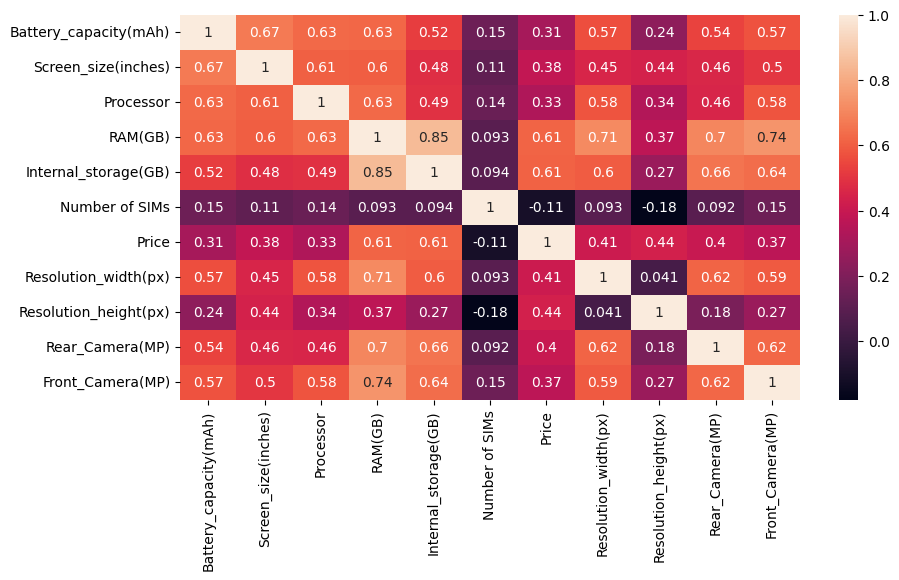

In [63]:
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True)

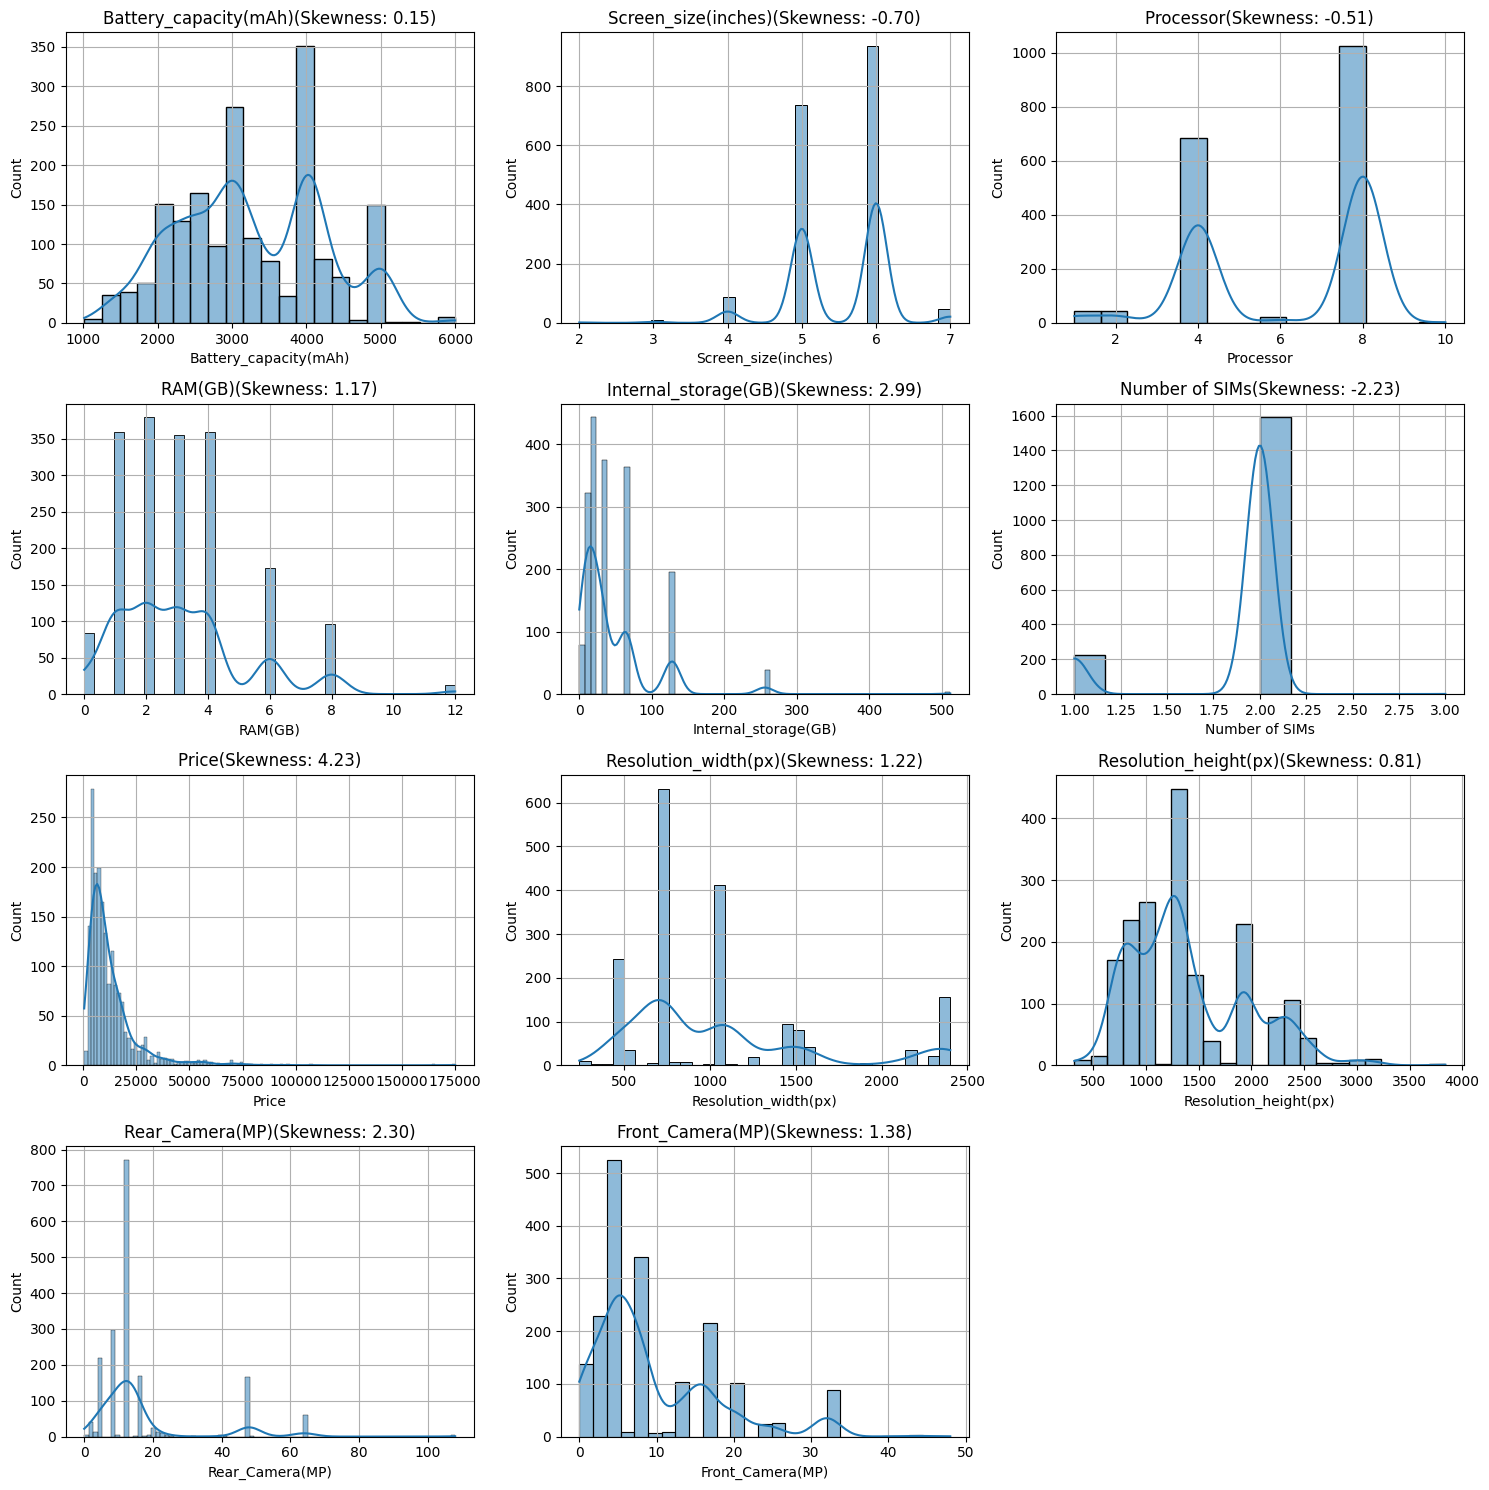

In [64]:
def plot_histogram(df, cols):
    plt.figure(figsize=(15, 15))
    for i, column in enumerate(cols, 1):
        plt.subplot(4, 3, i)
        sns.histplot(df[column], kde=True)
        skewness = df[column].skew()
        plt.grid(True)
        plt.title(f'{column}(Skewness: {skewness:.2f})')
        plt.xlabel(column)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

plot_histogram(df, numerical_features)

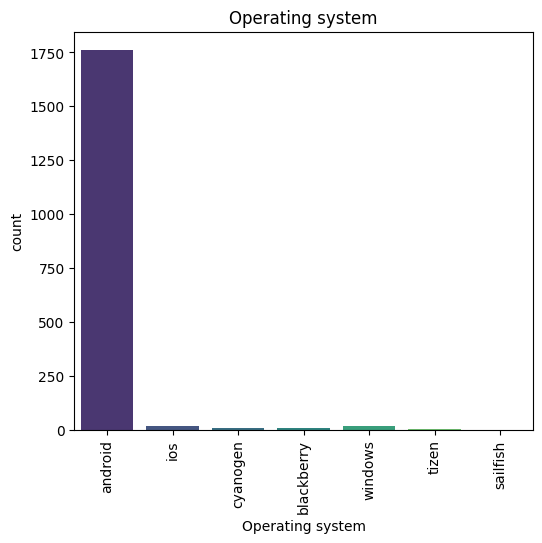

In [65]:
def plot_barplot(df, cols):
    plt.figure(figsize=(15, 20))
    cols = [col for col in cols if col not in ['Name', 'Brand']]
    for i, column in enumerate(cols, 1):
        plt.subplot(4, 3, i)
        sns.countplot(x=column, data=df, palette='viridis')
        plt.title(column)
        plt.xlabel(column)
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_barplot(df, categorical_features)


In [66]:

fig = px.histogram(df['Brand'], title='Mobile Brands')
fig.show()

In [67]:

fig = px.box(df, x='Brand', y='Price', color='Brand', title='Price Distribution by Brand', width=1500, height=500)
fig.show()

In [68]:
categorical_features

Index(['Brand', 'Operating system'], dtype='object')

<Figure size 640x480 with 0 Axes>

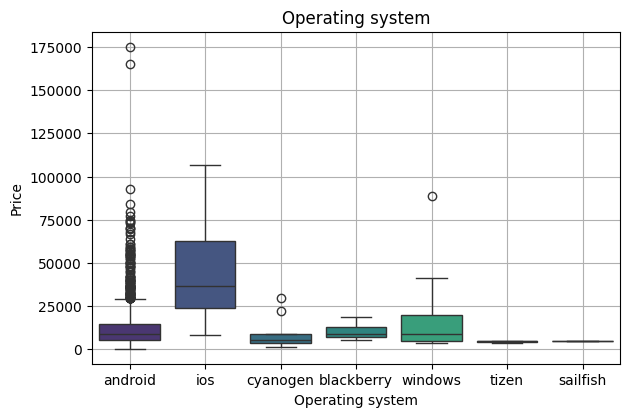

In [69]:
cols = ['Operating system']
def plot_boxplot(df,cols):
    plt.figure(figsize=(15,25))
    for i, column in enumerate(cols,1):
        plt.subplot(5,2,i)
        sns.boxplot(x=column, y='Price', data=df, palette='viridis')
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.grid(True)

plt.tight_layout()
plt.show()

plot_boxplot(df, cols)

In [70]:
df.head()

,Brand,Battery_capacity(mAh),Screen_size(inches),Processor,RAM(GB),Internal_storage(GB),Operating system,Number of SIMs,Price,Resolution_width(px),Resolution_height(px),Rear_Camera(MP),Front_Camera(MP)
0,oneplus,4085,7,8,12,256,android,2,58998,1440.0,3120.0,48,16
1,realme,4000,7,8,6,64,android,2,27999,1080.0,2400.0,64,16
2,apple,3969,7,6,4,64,ios,2,106900,1242.0,2688.0,12,12
3,apple,3110,6,6,4,64,ios,2,62900,828.0,1792.0,12,12
4,lg,4000,6,8,6,128,android,1,49990,1080.0,2340.0,12,32


<Figure size 640x480 with 0 Axes>

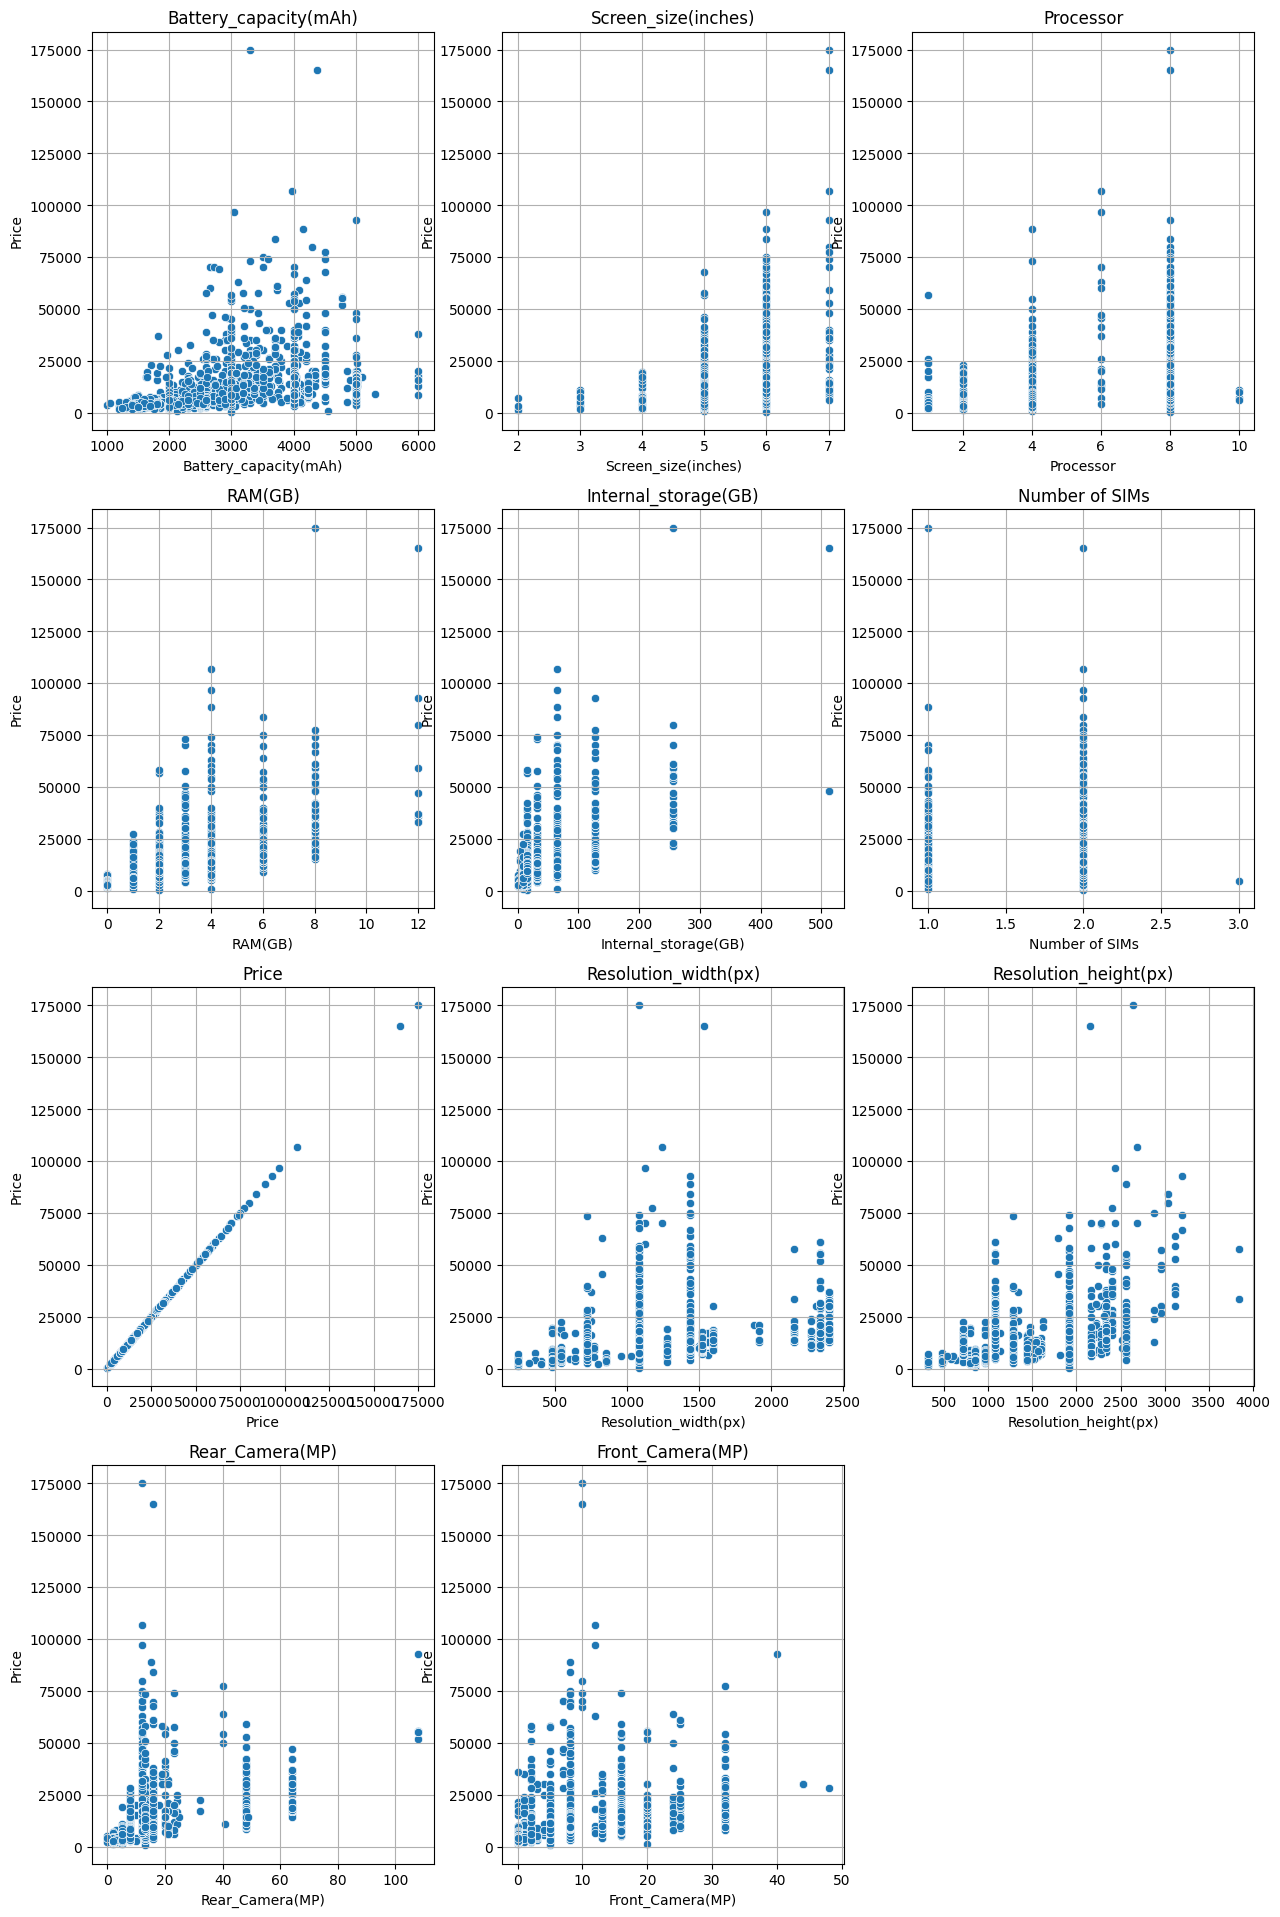

In [71]:
def plot_boxplot(df,cols):
    plt.figure(figsize=(15,30))
    for i, column in enumerate(cols,1):
        plt.subplot(5,3,i)
        sns.scatterplot(x=column, y='Price', data=df)
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.grid(True)

plt.tight_layout()
plt.show()

plot_boxplot(df, numerical_features)


#### Top 5 expensive mobiles

In [72]:
df_sorted = df.sort_values(by='Price', ascending=False)

df_sorted.head().T.reset_index()


,index,602,636,2,615,599
0,Brand,samsung,samsung,apple,apple,samsung
1,Battery_capacity(mAh),3300,4380,3969,3046,5000
2,Screen_size(inches),7,7,7,6,7
3,Processor,8,8,6,6,8
4,RAM(GB),8,12,4,4,12
5,Internal_storage(GB),256,512,64,64,128
6,Operating system,android,android,ios,ios,android
7,Number of SIMs,1,2,2,2,2
8,Price,174990,164999,106900,96900,92999
9,Resolution_width(px),1080.0,1536.0,1242.0,1125.0,1440.0


#### Top 5 cheapest mobiles

In [73]:
df_sorted.tail().T.reset_index()

,index,1151,142,1210,331,1086
0,Brand,lava,jio,lg,gionee,lyf
1,Battery_capacity(mAh),1200,2000,2125,4550,3000
2,Screen_size(inches),4,2,5,6,6
3,Processor,2,2,4,8,8
4,RAM(GB),0,0,1,4,2
5,Internal_storage(GB),4,4,8,64,16
6,Operating system,android,cyanogen,android,android,android
7,Number of SIMs,2,1,1,2,2
8,Price,1999,1249,994,994,494
9,Resolution_width(px),480.0,240.0,480.0,1080.0,1080.0


In [74]:
df.columns

Index(['Brand', 'Battery_capacity(mAh)', 'Screen_size(inches)', 'Processor',
       'RAM(GB)', 'Internal_storage(GB)', 'Operating system', 'Number of SIMs',
       'Price', 'Resolution_width(px)', 'Resolution_height(px)',
       'Rear_Camera(MP)', 'Front_Camera(MP)'],
      dtype='object')